Dataset:
https://www.kaggle.com/datasets/bidemiayinde/thyroid-sickness-determination/data

Github:
https://github.com/ZSV-PROJECT/thyroid-sickness

Summary:

- What features/columns had a relatively even or normal distribution? Which features/columns did not?

None of the categorical columns were even/normal.
The only numerical column that seems close to normal is the age column.

- How did you handle missing values? Why did you do this method as opposed to others?

I wanted to remove them, but I ended up imputing them to the average. Removing them is better since a large amount of the data was missing, and imputing those values would introduce bias. The data would appear more normal. However I was not able to successfully remove them without causing some error so I ended up just imputing.

- How did you encode your categorical data? Why did you do this method as opposed to others?

I used One Hot Encoding for the referral source column and a Label Encoder for the other columns. The referral source column contained nonordinal values, and the other columns could be classified by binary.

- How did you handle removing outliers? Why did you use this method as opposed to others?

I set a boundary to remove outliers. I did this because I wanted to more finely control outlier removal. This dataset has a large amount of outliers because the data spans a wide scale of values. By manually controlling what is removed, I can keep these characteristics while removing extremities. This is a potential source of bias but I feel that it better represents the dataset.

- How did you normalize/standardize the data? Why did you use this method as opposed to others?

I standardised the data. Lots of outliers, so using normalisation would place more emphasis on outliers. Additionally, the models performed better with standardisation.

- How did each model perform? Which performed the best?

Regressors:
- Tree: Perfect training. Good testing. Poor metric performance. Extremely high bias.
- Linear: Poor. Poor metric performance. High bias (based on r^2).
- MLP: Good. Ok metric performance. High bias with high variance (based on r^2).
- Logistic: Good. Poor metric performance. Some bias, some variance.
- SVR: Ok training. Poor testing. Poor metric performance. Moderate amount of bias.

Classifiers:
- SVC: Good. Some variance. Recall score is a bit low compared to other metrics.
- MLP: Good. Doesn't appear to have high bias or variance.

The MLP Classifier performed the best. After generating a few models, it had lower precision than the SVM Classifier but better score, recall, and f1 rate.

- Did any models seem to have a relatively high amount of bias (underfitting)? Variance (overfitting)?

The decision tree was overfitting as it perfectly predicted the training set but did not perfectly predict the testing set. The MLP and SVM regressors were also overfit, but not as extremely as the decision tree. Interestingly, the logistic regressor performed well on both datasets but had high variance with a low R2 value.

Libraries

In [80]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Import dataset
df = pd.read_csv('dataset.csv')
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


Check each column

In [81]:
for col in df:
    print(col)
    print(df[col].unique())

print(df.dtypes)

age
['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' '?' '93' '92']
sex
['F' 'M' '?']
on_thyroxine
['f' 't']
query_on_thyroxine
['f' 't']
on_antithyroid_medication
['f' 't']
sick
['f' 't']
pregnant
['f' 't']
thyroid_surgery
['f' 't']
I131_treatment
['f' 't']
query_hypothyroid
['f' 't']
query_hyperthyroid
['f' 't']
lithium
['f' 't']
goitre
['f' 't']
tumor
['f' 't']
hypopituitary
['f' 't']
psych
['f' 't']
TSH_measured
['t' 'f']
TSH
['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' '?' '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' 

Cleaning

In [82]:
# If pregnant, change sex to F. Just insurance.
df.loc[df['pregnant'] == 't', 'sex'] = 'F'

# Drop TBG and TBG_measured column since it's all nan/f
df = df.drop(columns=['TBG', 'TBG_measured'], axis=1)

# Replace all ? with nans
df = df.replace("?", np.nan)
df = df.replace("NaN", np.nan)

# Drop nans for binary classification
df = df.dropna(subset='sex')

print(df.shape)

(3624, 28)


Check the DF again

In [83]:
for col in df:
    print(col)
    print(df[col].unique())

age
['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26' '58'
 '64' '44' '48' '61' '35' '83' '87' '53' '77' '27' '69' '74' '76' '36'
 '22' '43' '72' '82' '31' '39' '49' '62' '57' '50' '30' '29' '75' '19' '7'
 '79' '38' '17' '21' '24' '42' '15' '45' '32' '47' '1' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92']
sex
['F' 'M']
on_thyroxine
['f' 't']
query_on_thyroxine
['f' 't']
on_antithyroid_medication
['f' 't']
sick
['f' 't']
pregnant
['f' 't']
thyroid_surgery
['f' 't']
I131_treatment
['f' 't']
query_hypothyroid
['f' 't']
query_hyperthyroid
['f' 't']
lithium
['f' 't']
goitre
['f' 't']
tumor
['f' 't']
hypopituitary
['f' 't']
psych
['f' 't']
TSH_measured
['t' 'f']
TSH
['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' '2.5' '0.5

Convert types. Check NaNs.

In [84]:
floatCols = ['age', 'TSH', 'T3',
             'TT4', 'T4U', 'FTI']

for col in floatCols:
    df[col] = df[col].astype(float)

for col in df:
    naCount = df[col].isna().sum()
    if naCount > 0:
        print(f"NaN for {col}: {naCount}")

NaN for age: 1
NaN for TSH: 352
NaN for T3: 745
NaN for TT4: 217
NaN for T4U: 367
NaN for FTI: 365


Seems that there is a large amount of NaNs. About 1/4 of the data...

It's probably better to remove them rather than to impute them, since keeping them in could introduce bias.

But when I removed them, the "measured" columns got messed up. So I'll just impute them?

In [85]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

for col in floatCols:
    df[col] = imputer.fit_transform(df[col].values.reshape(-1, 1))

# The age should be an integer
df['age'] = np.floor(df['age'])
df['age'] = df['age'].astype(int)

# There also seems to be an age of 455,
# It's likely that the age should instead be 45
df.loc[df['age'] == 455, 'age'] = 45

for col in df:
    print(col)
    print(df[col].unique())

df.head()

age
[41 23 46 70 18 59 80 66 68 84 67 71 28 65 63 51 81 54 55 60 25 73 34 78
 37 85 26 58 64 44 48 61 35 83 87 53 77 27 69 74 76 36 22 43 72 82 31 39
 49 62 57 50 30 29 75 19  7 79 38 17 21 24 42 15 45 32 47  1 16 52 33 13
 10 89 56 20 90 40 88 14 86 94 12  4 11  8  5  2 91  6 93 92]
sex
['F' 'M']
on_thyroxine
['f' 't']
query_on_thyroxine
['f' 't']
on_antithyroid_medication
['f' 't']
sick
['f' 't']
pregnant
['f' 't']
thyroid_surgery
['f' 't']
I131_treatment
['f' 't']
query_hypothyroid
['f' 't']
query_hyperthyroid
['f' 't']
lithium
['f' 't']
goitre
['f' 't']
tumor
['f' 't']
hypopituitary
['f' 't']
psych
['f' 't']
TSH_measured
['t' 'f']
TSH
[1.30000000e+00 4.10000000e+00 9.80000000e-01 1.60000000e-01
 7.20000000e-01 3.00000000e-02 5.00313111e+00 2.20000000e+00
 6.00000000e-01 2.40000000e+00 1.10000000e+00 2.80000000e+00
 3.30000000e+00 1.20000000e+01 1.50000000e+00 6.00000000e+00
 2.10000000e+00 1.00000000e-01 8.00000000e-01 1.90000000e+00
 3.10000000e+00 2.00000000e-01 1.30000000e+01 3.

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,2.500000,t,125.0,t,1.140000,t,109.000000,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,2.000000,t,102.0,f,0.995755,f,110.266677,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,f,2.011337,t,109.0,t,0.910000,t,120.000000,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,1.900000,t,175.0,f,0.995755,f,110.266677,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,1.200000,t,61.0,t,0.870000,t,70.000000,SVI,negative


Check outliers

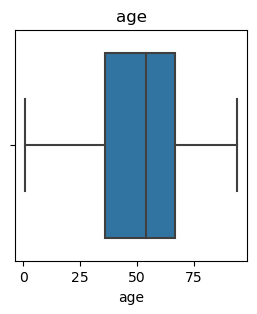

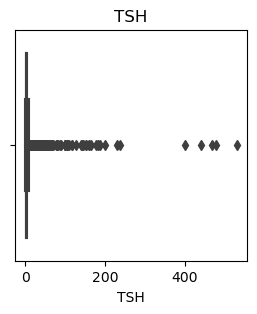

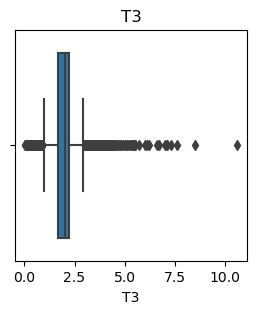

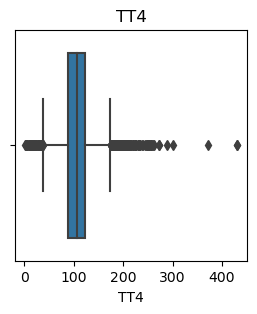

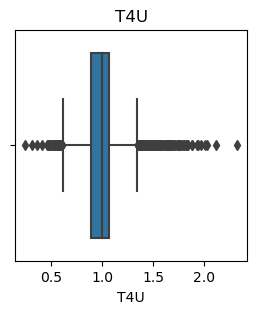

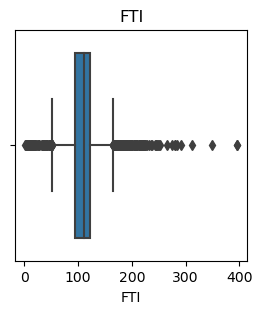

In [86]:
for col in floatCols:
    plt.figure(figsize=(3, 3))
    sns.boxplot(x=df[col])
    plt.title(f'{col}')
    plt.show()

Well, age looks fine. The rest could be cut off.

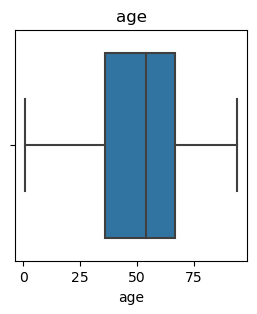

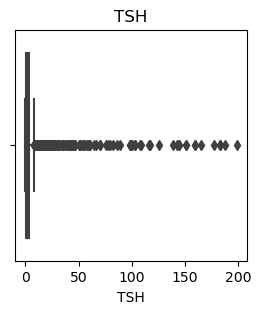

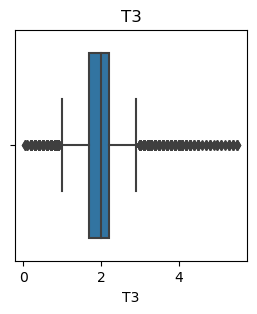

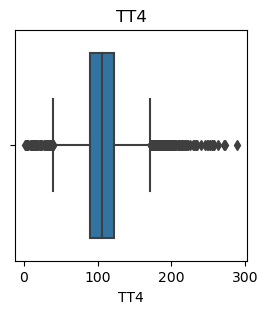

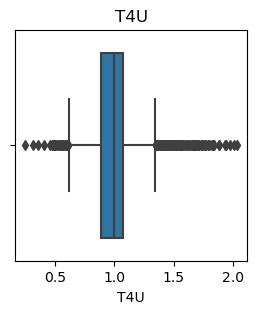

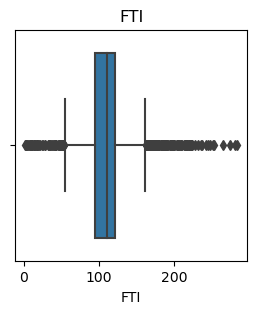

In [87]:
df = df[df["TSH"] < 200]
df = df[df["T3"] < 6]
df = df[df["TT4"] < 300]
df = df[df["T4U"] < 2.1]
df = df[df["FTI"] < 300]

for col in floatCols:
    plt.figure(figsize=(3, 3))
    sns.boxplot(x=df[col])
    plt.title(f'{col}')
    plt.show()

Encode binary columns

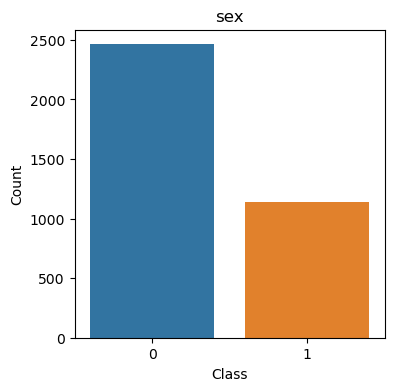

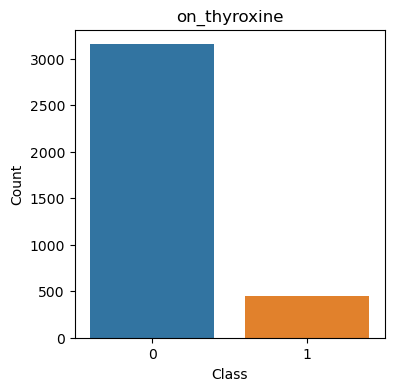

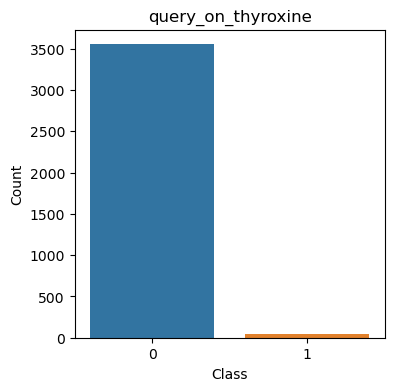

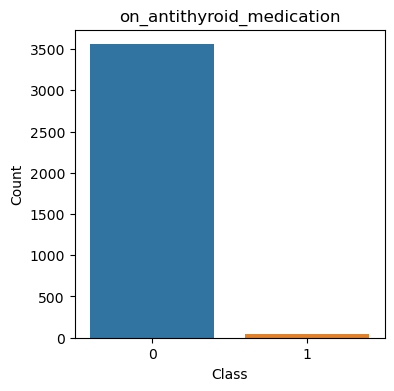

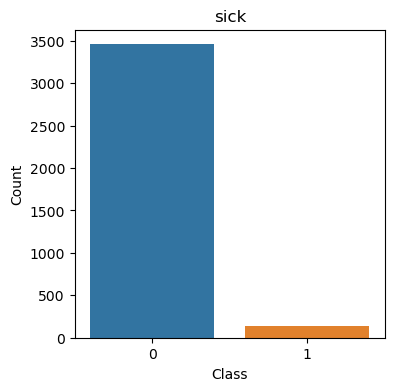

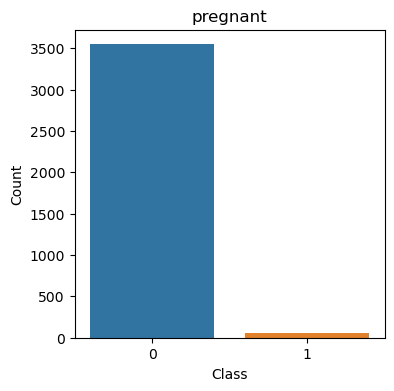

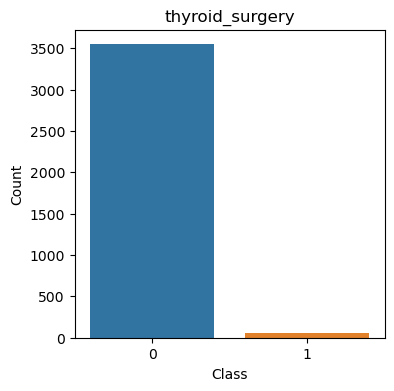

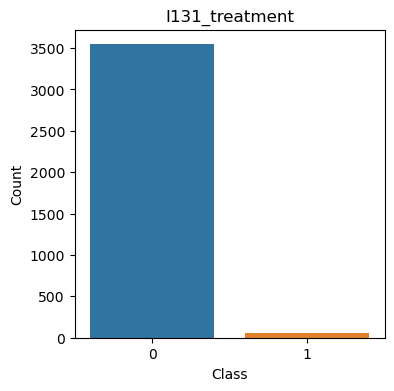

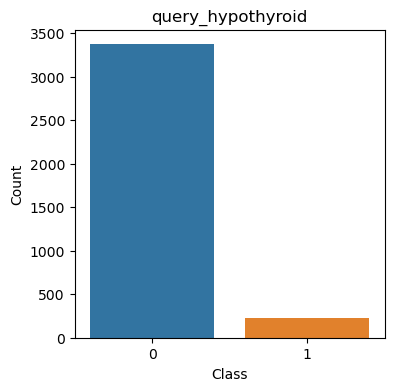

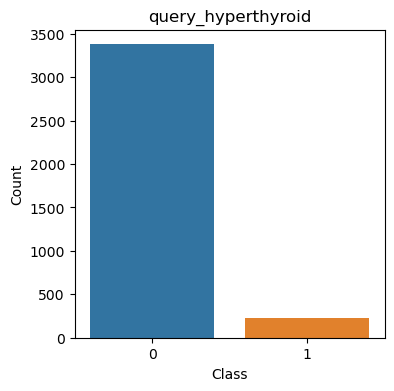

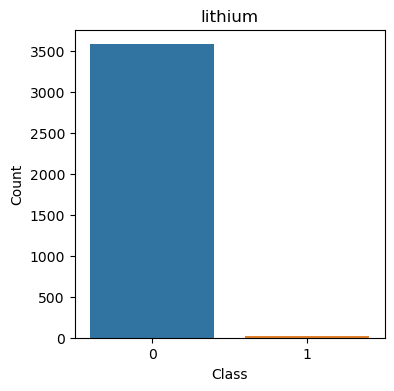

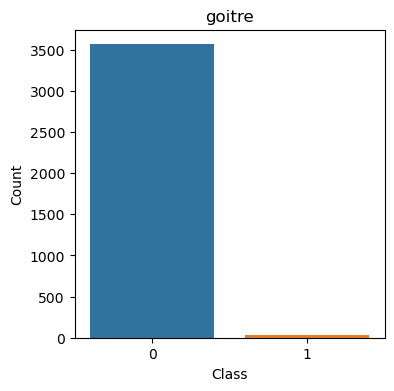

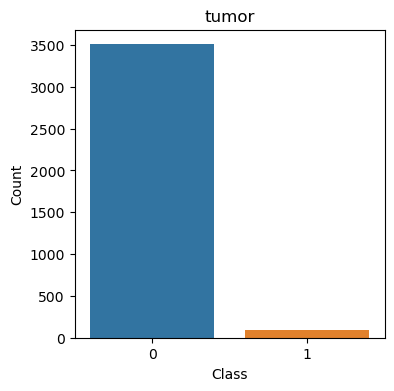

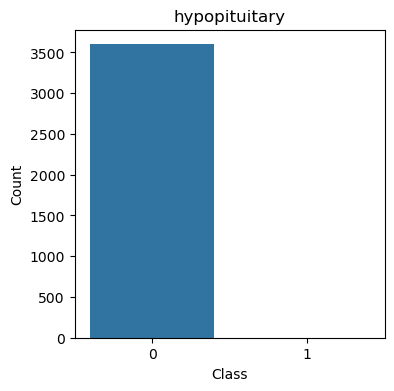

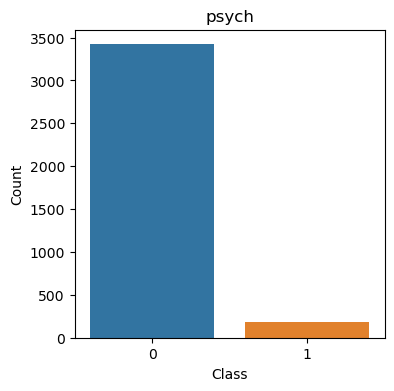

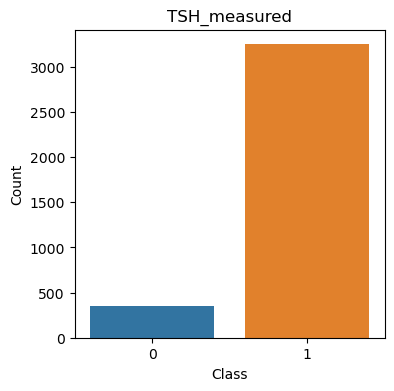

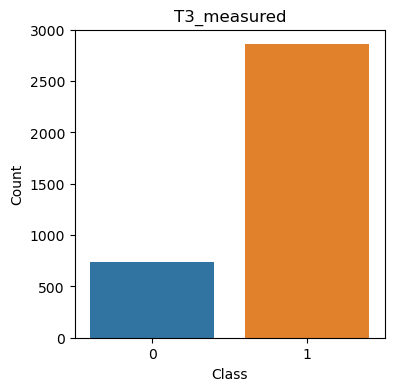

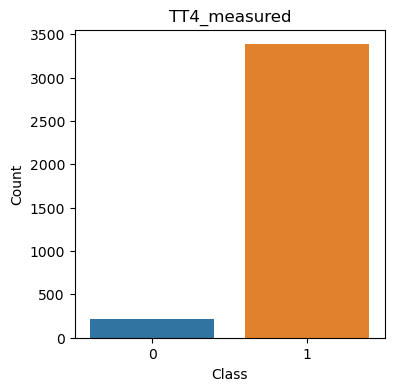

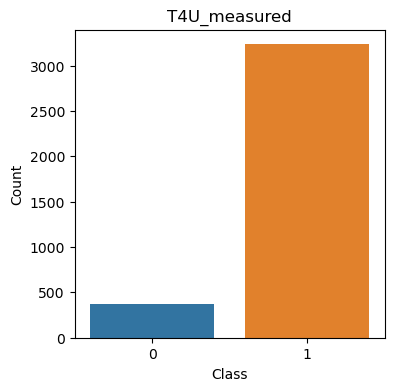

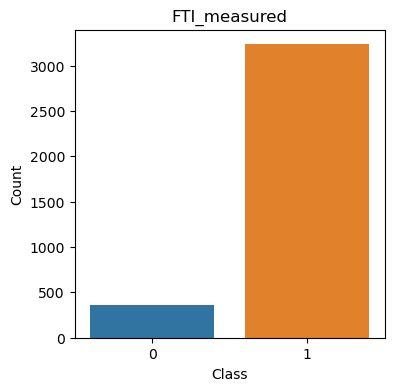

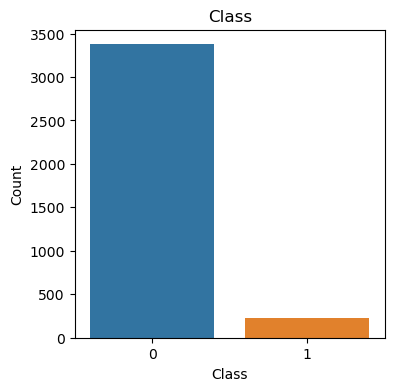

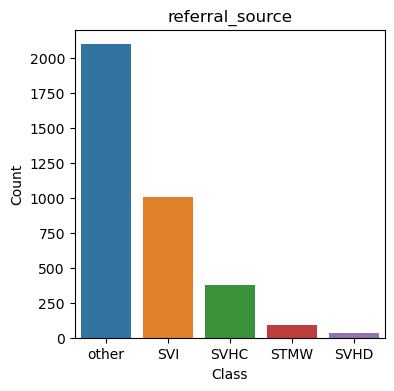

In [88]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

# These are all binary so they should be converted to a binary classifier
binaryCols = ['sex', 'on_thyroxine', 'query_on_thyroxine',
              'on_antithyroid_medication','sick','pregnant',
              'thyroid_surgery','I131_treatment','query_hypothyroid',
              'query_hyperthyroid','lithium','goitre',
              'tumor','hypopituitary','psych',
              'TSH_measured','T3_measured','TT4_measured',
              'T4U_measured','FTI_measured','Class']

for col in binaryCols:
    df[col] = lab.fit_transform(df[col])
    plt.figure(figsize=(4, 4))
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(f'{col}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

plt.figure(figsize=(4, 4))
sns.barplot(x=df['referral_source'].value_counts().index, y=df['referral_source'].value_counts().values)
plt.title(f'referral_source')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The data is pretty varied and wide, so I will standardise the columns.

In [89]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# df[floatCols] = scaler.fit_transform(df[floatCols])

# for col in df:
#     print(col)
#     print(df[col].unique())

# df.shape

# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[floatCols] = scaler.fit_transform(df[floatCols])

Now to encode the referral source. For some reason the sklearn method made more rows...

In [90]:
oneHotDF = pd.get_dummies(df[['referral_source']])
rfVals = "referral_source_" + df['referral_source'].unique()

df = pd.concat([df, oneHotDF], axis=1).drop(columns=['referral_source'])

for col in rfVals:
    df[col] = lab.fit_transform(df[col])

print(df.shape)

df.tail()

(3600, 32)


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U_measured,T4U,FTI_measured,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
3767,-1.150762,0,0,0,0,0,0,0,0,0,...,0,0.009042,0,0.012905,0,0,0,0,0,1
3768,0.857123,0,0,0,0,0,0,0,0,0,...,1,0.472124,1,0.140886,0,0,0,0,1,0
3769,1.174158,0,0,0,0,0,0,0,0,0,...,1,0.417156,1,-0.167641,0,0,0,0,0,1
3770,1.068480,1,0,0,0,0,0,0,0,0,...,1,-0.297435,1,-0.784695,0,0,0,0,1,0
3771,0.645767,0,0,0,0,0,0,0,0,0,...,1,0.417156,1,-0.613291,0,0,0,0,0,1


Seems ready for models?
I did both classifier and regression.
The classifiers make more sense for this data but it would be interesting to see how the regressors perform.

In [91]:
yDf = df['Class']
xDf = df.drop(columns='Class')

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

xTrain, xTest, yTrain, yTest = train_test_split(xDf, 
                                                yDf, 
                                                test_size=0.3)

ChatGPT Prompt:
```
how to get r2, rmse, and mae from this:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(xTrain, yTrain)
regressor.score(xTest, yTest)
```

I interpolated the response for other models.

Decision Tree Regressor

Scored well. Decent metric performance.

In [93]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming xTrain, xTest, yTrain, yTest are your training and testing data
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(xTrain, yTrain)

# Obtain predictions on the test data
yPred = regressor.predict(xTest)

# Calculate R-squared (R²)
r_squared = r2_score(yTest, yPred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(yTest, yPred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(yTest, yPred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display the metrics
print(f'Train score: {regressor.score(xTrain, yTrain)}')
print(f'Test score: {regressor.score(xTest, yTest)}')
print(f'R-squared (R²): {r_squared:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Train score: 1.0
Test score: 0.728639428244392
R-squared (R²): 0.73
Mean Absolute Error (MAE): 0.02
Root Mean Squared Error (RMSE): 0.13


Linear Regression

Poor score. Metrics scored poorly.

In [94]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(xTrain, yTrain)
yPred = reg.predict(xTest)

r_squared = r2_score(yTest, yPred)
mae = mean_absolute_error(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)

print(f'Train score: {reg.score(xTrain, yTrain)}')
print(f'Test score: {reg.score(xTest, yTest)}')
print(f'R-squared (R²): {r_squared:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Train score: 0.2439372961158358
Test score: 0.2557801358770061
R-squared (R²): 0.26
Mean Absolute Error (MAE): 0.13
Root Mean Squared Error (RMSE): 0.21


MLP Regressor.

Scored decently.

In [95]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500).fit(xTrain, yTrain)
yPred = mlp.predict(xTest)

r_squared = r2_score(yTest, yPred)
mae = mean_absolute_error(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)

print(f'Train score: {mlp.score(xTrain, yTrain)}')
print(f'Test score: {mlp.score(xTest, yTest)}')
print(f'R-squared (R²): {r_squared:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Train score: 0.792331877888161
Test score: 0.647267514278427
R-squared (R²): 0.65
Mean Absolute Error (MAE): 0.08
Root Mean Squared Error (RMSE): 0.15


Logistic Regressor.

Scored well. Poor metric performance.

In [96]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42).fit(xTrain, yTrain)
yPred = lr.predict(xTest)

r_squared = r2_score(yTest, yPred)
rmse = mean_squared_error(yTest, yPred, squared=False)
mae = mean_absolute_error(yTest, yPred)

print(f'Train score: {lr.score(xTrain, yTrain)}')
print(f'Test score: {lr.score(xTest, yTest)}')
print(f'R-squared (R²): {r_squared:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Train score: 0.9718253968253968
Test score: 0.9694444444444444
R-squared (R²): 0.50
Root Mean Squared Error (RMSE): 0.17
Mean Absolute Error (MAE): 0.03


SVM Regressor

Scored well on train, poor on test. Poor metric performance.

In [97]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)).fit(xTrain, yTrain)
yPred = svr.predict(xTest)

r_squared = r2_score(yTest, yPred)
rmse = mean_squared_error(yTest, yPred, squared=False)
mae = mean_absolute_error(yTest, yPred)

print(f'Train score: {svr.score(xTrain, yTrain)}')
print(f'Test score: {svr.score(xTest, yTest)}')
print(f'R-squared (R²): {r_squared:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Train score: 0.48815704259483417
Test score: 0.39443196229380284
R-squared (R²): 0.39
Root Mean Squared Error (RMSE): 0.19
Mean Absolute Error (MAE): 0.14


SVM Classifier

ChatGPT Prompt:
```
how to get precision, recall, and f1 score from this:

from sklearn.svm import SVC

svc = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(xTrain, yTrain)
svc.score(xTest, yTest)
```

In [98]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming xTrain, xTest, yTrain, yTest are your training and testing data
svc = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(xTrain, yTrain)

# Obtain predictions on the test data
yPred = svc.predict(xTest)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)

# Display the metrics
print(f'Train score: {svc.score(xTrain, yTrain)}')
print(f'Test score: {svc.score(xTest, yTest)}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Train score: 0.9702380952380952
Test score: 0.9694444444444444
Precision: 0.88
Recall: 0.62
F1 Score: 0.73


MLP Classifier

In [99]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

mlpc = MLPClassifier(random_state=1, max_iter=1000).fit(xTrain, yTrain)
yPred = mlpc.predict(xTest)

precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)

print(f'Train score: {mlpc.score(xTrain, yTrain)}')
print(f'Test score: {mlpc.score(xTest, yTest)}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Train score: 0.9968253968253968
Test score: 0.9805555555555555
Precision: 0.88
Recall: 0.82
F1 Score: 0.85
